# Local Binary Pattern & Uniform Local Binary Pattern implementation

I have seen videos about the utility about this algorithms but I haven't seen how to implement the Uniform Local Binary Pattern LBP. Here I try to adress how to deploy it. The ULBP table of diagrams is located here: https://i.stack.imgur.com/AMLGu.png  

In [39]:
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Open image with PIL

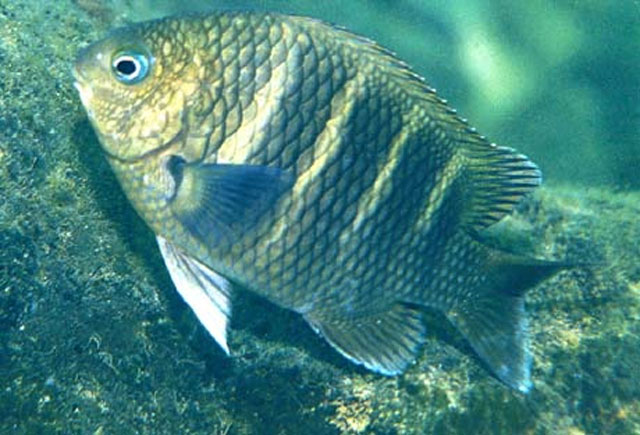

In [40]:
imageN="fish_1.jpg"
imageP=Image.open(imageN)
imageP

Validate that it is an rbg image. Three dimensions for every x,y pair

In [61]:
imnp=np.asarray(imageP)
imageP.close() #Close opened image
imnp.shape

(435, 640, 3)

Convert the image to grayscale. Even though there are libraries to do it I prefered to do it by formula to show the process

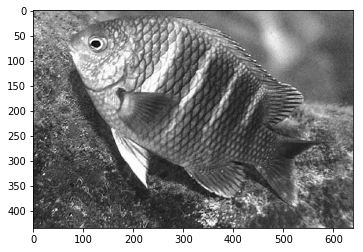

In [42]:
def rgbToG(npImg,rw=0.21,gw=0.72,bw=0.07):
    r=npImg[:,:,0]
    g=npImg[:,:,1]
    b=npImg[:,:,2]
    npG=r*rw+g*gw+b*bw
    return npG
imnpg=rgbToG(imnp)
plt.imshow(imnpg,cmap='gray')
plt.show()

Here I define a function that performs the evaluation if the surrounding bits are higher than the central bit, if so they become a 1, else a 0. Therefore convert the sequence into a decimal number as the LBP suggests.  
This process is repeated for every bit of the image, except for the borders.

In [50]:
def lbp(npArG,fs=3):
    xw=npArG.shape[0]
    yw=npArG.shape[1]
    np_lbp=np.zeros((xw-2,yw-2))
    for y in range(0,yw-2):
        for x in range(0,xw-2):
            xc=x+1
            npeA=np.array([npArG[x,y+1],npArG[x,y+2],npArG[x+1,y+2],npArG[x+2,y+2],npArG[x+2,y+1],npArG[x+2,y],npArG[x+1,y],npArG[x,y]])
            np_lbp[x,y]=binToDec(npeA,xc)
    return np_lbp
def binToDec(npArr,th):
    #th: threshhold to become a one
    bina=npArr.copy()
    bina[npArr>=th]=1
    bina[npArr<th]=0
    sumb=0
    for i in range(0,8):
        sumb+=bina[i]*2**(7-i)
    return sumb

Use the functions to get the LBP

In [52]:
imnpg_lbp=lbp(imnpg)

See the transformed image and the histogram associated to it

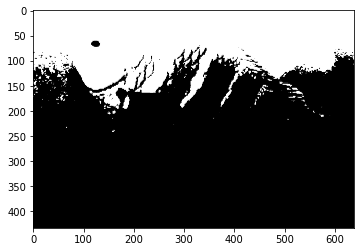

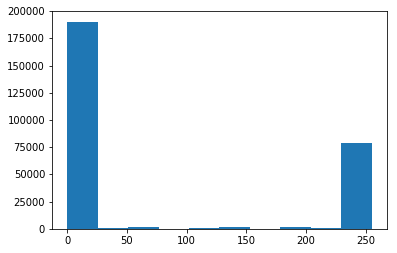

In [60]:
plt.imshow(imnpg_lbp,cmap='gray')
plt.show()
plt.hist(imnpg_lbp.flatten())
plt.show()

## ULBP 

Here we follow this sequence:  
a) Every window of bits is arranged in clock wise order. The lowest significant bit is the bit that corresponds to 3pm. and the Most significant bit 2pm.  
b) Find which bits are higher than the threshold that is the central bit. Those higher or equal become a 1, else 0.  
c) We create an array of variations, the first derivative.  
d) We get how many ones we had in the bit sequence. Also how many variations we got in the derivative.  
e) As ULBP suggests, when we have a variation of 2 or 0, it becomes uniform. Then we assign a class/label to it according to a table https://i.stack.imgur.com/AMLGu.png  . All that are not uniform to another single class (In the code class 58.  
f) When it is uniform, by multiplying the original bit sequence by the derivative we will get the leading variation  bit. This will help us to classify according to the table of classes.  
g) The line 'sumb=(lbinS-1)*8+np.nonzero(ldl)-(lbinS-lbinS%2)/2' will provide the class according to the table following the previous principle.  


In [104]:
def ulbp(npArG,fs=3):
    xw=npArG.shape[0]
    yw=npArG.shape[1]
    np_ulbp=np.zeros((xw-2,yw-2))
    for y in range(0,yw-2):
        for x in range(0,xw-2):
            xc=x+1
            npeA=np.array([npArG[x+2,y+1],npArG[x+2,y+2],npArG[x+1,y+2],npArG[x,y+2],npArG[x,y+1],npArG[x,y],npArG[x+1,y],npArG[x+2,y]])
            np_ulbp[x,y]=binToUlb(npeA,xc)
    return np_ulbp
def binToUlb(npA,th):
    bina=npA.copy()
    bina[npA>=th]=1
    bina[npA<th]=0
    sumb=0
    lbin=len(bina)
    ldif=np.zeros((lbin,))
    for i in range(0,lbin):#Looking for variations
        ldif[i]=bina[i]-bina[(i+1)%lbin]
    varA=ldif.sum()#Counting the amount of variations
    lbinS=bina.sum()#Number of ones
    if varA==2:
        ldl=ldif*lbin#looking for the position of the lead variation
        sumb=(lbinS-1)*8+np.nonzero(ldl)-(lbinS-lbinS%2)/2
    elif varA==0:
        sumb=(lbinS/8)*57
    else:
        sumb=58
    return sumb    

Execute the ulbp function

In [105]:
imnpg_ulbp=ulbp(imnpg)

Get the histogram related

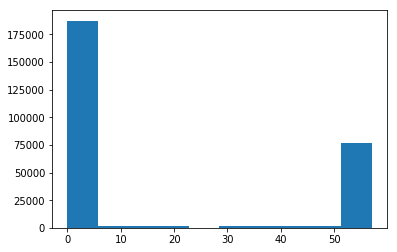

In [108]:
plt.hist(imnpg_ulbp.flatten())
plt.show()